# Environment Set-up

```bash
mamba create -n project-health python=3.11 jupyterlab -c conda-forge
mamba activate project-health  # activate our environment
jupyter lab               # this will start up jupyter lab and open a browser
```

# pre-install

In [1]:
!mamba install -c conda-forge -y matplotlib
!mamba install -y pandas
!mamba install -y numpy
!mamba install -c anaconda -y scikit-learn
!mamba install -c conda-forge -y kneed
!mamba install -c conda-forge -y seaborn
!mamba install -c conda-forge -y scikit-learn-extra


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['matplotlib']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
er

In [150]:
!mamba install -c conda-forge -y scikit-learn-extra


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['scikit-learn-extra']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.

# read data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [96]:
data = pd.read_csv("./data/project0000.csv")
# Adding an ID column with incremental values starting from 1
data['ID'] = range(1, 1 + len(data))

In [97]:
type(data)

pandas.core.frame.DataFrame

In [98]:
data.head()

,dates,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID
0,2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1
1,2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2
2,2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3
3,2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4
4,2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5


Converting date/time strings to datetime objects
To efficiently work with time series, we need to convert date or time strings to datetime objects using the pandas.to_datetime function:

In [99]:
data['dates'] = pd.to_datetime(data['dates'])
print(data['dates'].dtypes)

datetime64[ns]


Setting a datetime column as a dataframe index
Now, let's set the Date column as a dataframe index using the set_index method:

In [100]:
data = data.set_index('dates')
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID
dates,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5


There are 13 features
'monthly_commits', 'monthly_contributors', 'monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments', 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments', 'monthly_stargazer', 'monthly_forks', 'monthly_watchers'

In [104]:
# Add two columns and store the result in a new column
data['activity'] = data['monthly_commits'] + data['monthly_contributors']
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,activity
dates,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1,124
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2,53
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3,41
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4,8
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5,2


# data visualization

Creating a basic single-line matplotlib time series plot
To create a basic time series line plot, we use the standard matplotlib.pyplot.plot(x, y) method:

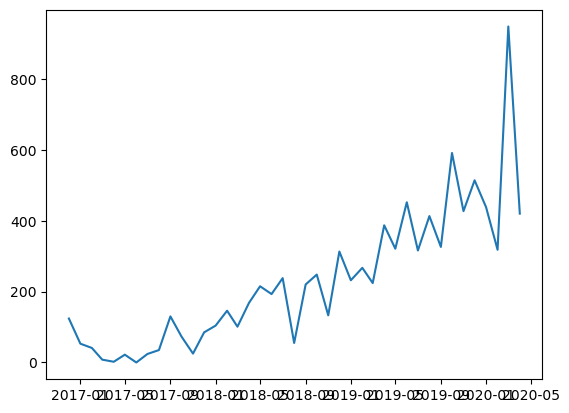

In [112]:
plt.plot(data.index, data['activity'])

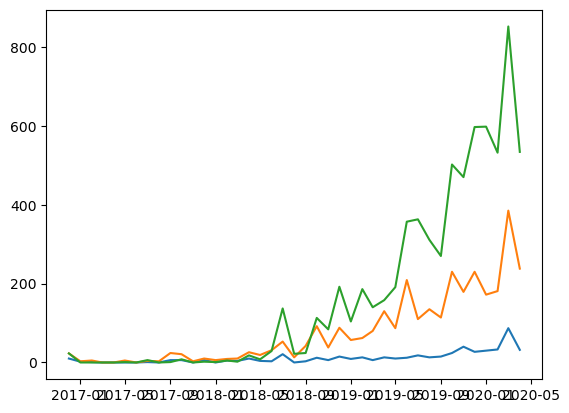

In [43]:
for col in ['monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments']:
    plt.plot(data.index, data[col])

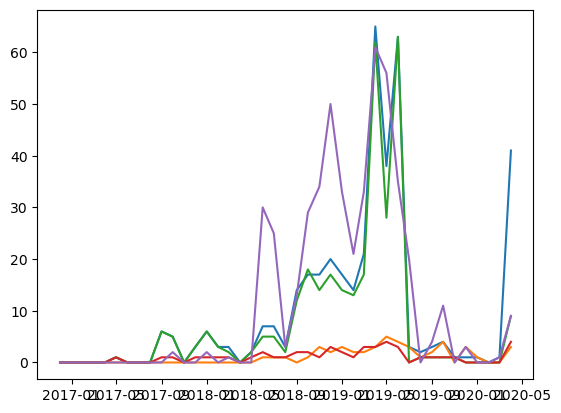

In [110]:
for col in ['monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments']:
    plt.plot(data.index, data[col])

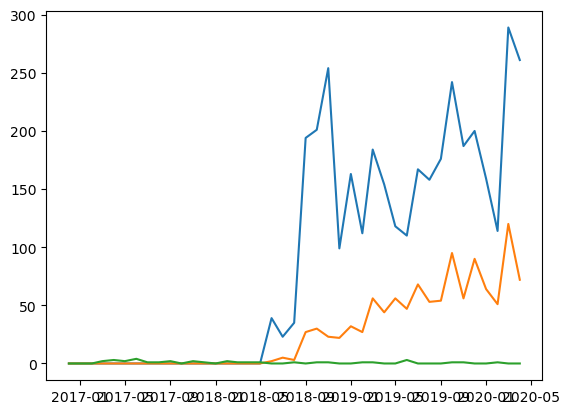

In [111]:
for col in ['monthly_stargazer', 'monthly_forks', 'monthly_watchers']:
    plt.plot(data.index, data[col])

# K-means

In [123]:
feature = 'monthly_closed_issues'
feature_labels = feature + '_labels'
feature_labels

'monthly_closed_issues_labels'

In [125]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(feature):
    feature_labels = feature + '_labels'
    
    df = pd.DataFrame(data, columns=['ID', feature])

    # Number of clusters
    k = 2

    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters
    plt.scatter(df['ID'], df[feature], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
    plt.show()

    # add labels as new column
    data[feature_labels] = labels

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


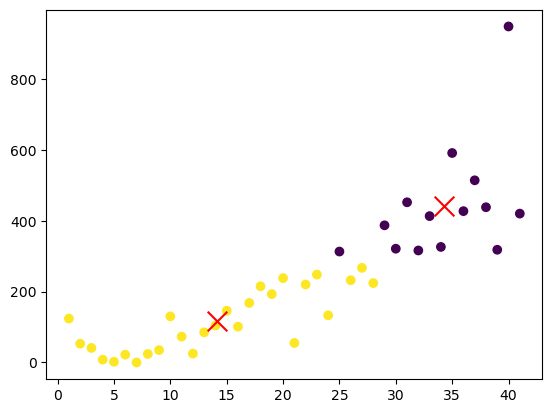

In [129]:
feature = 'activity'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


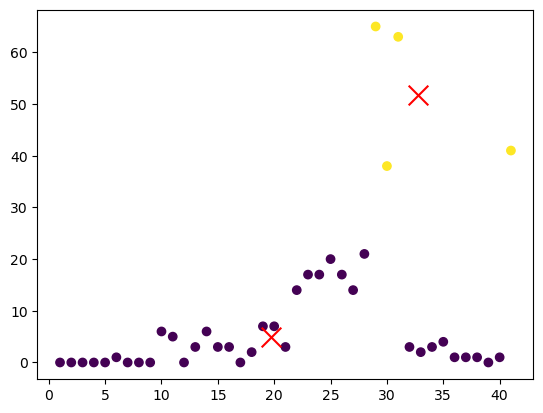

In [131]:
feature = 'monthly_open_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


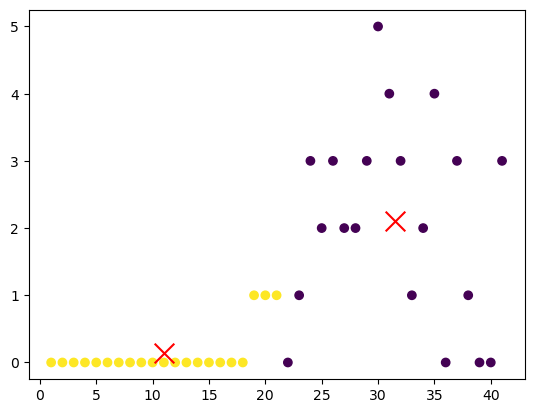

In [132]:
feature = 'monthly_closed_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


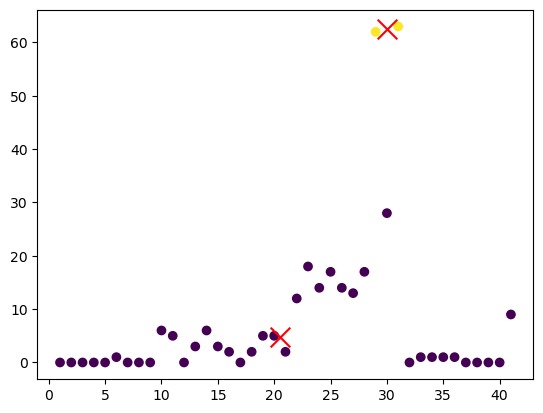

In [133]:
feature = 'monthly_merged_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


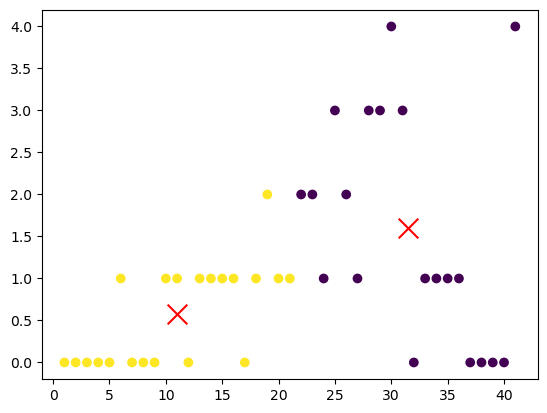

In [134]:
feature = 'monthly_PR_mergers'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


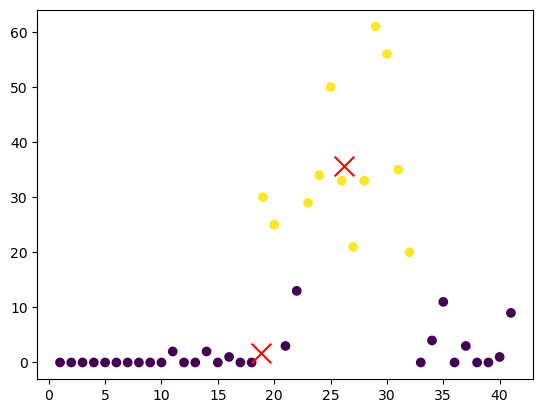

In [135]:
feature = 'monthly_PR_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


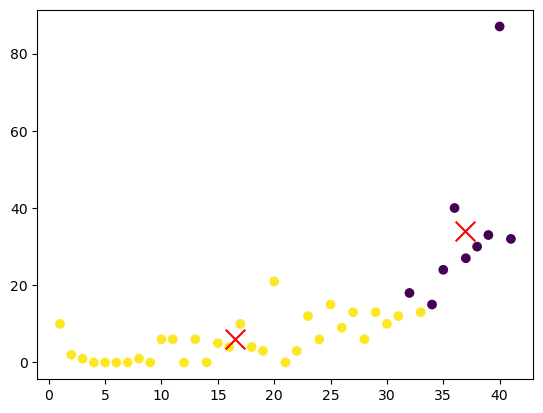

In [136]:
feature = 'monthly_open_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


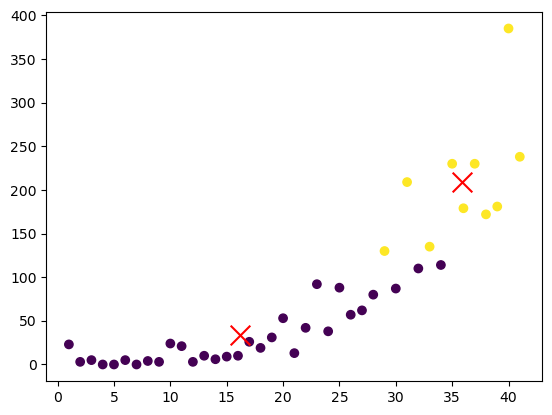

In [126]:
feature = 'monthly_closed_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


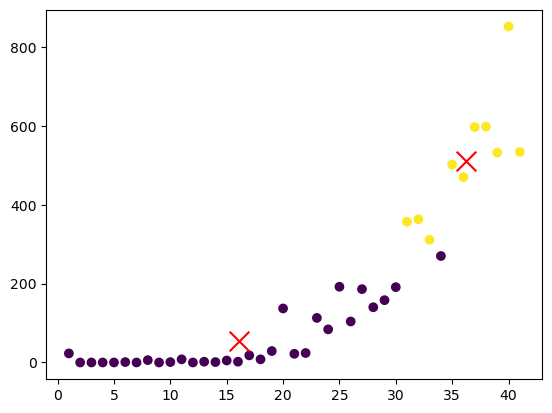

In [137]:
feature = 'monthly_issue_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


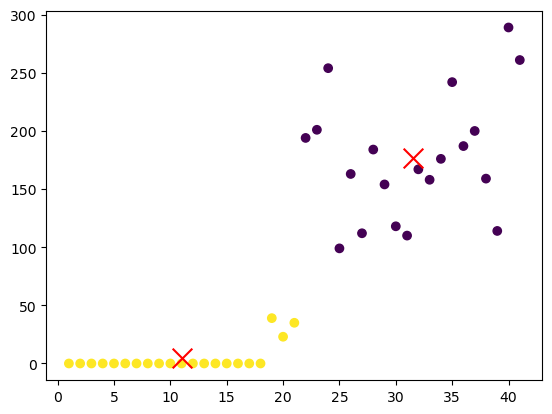

In [138]:
feature = 'monthly_stargazer'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


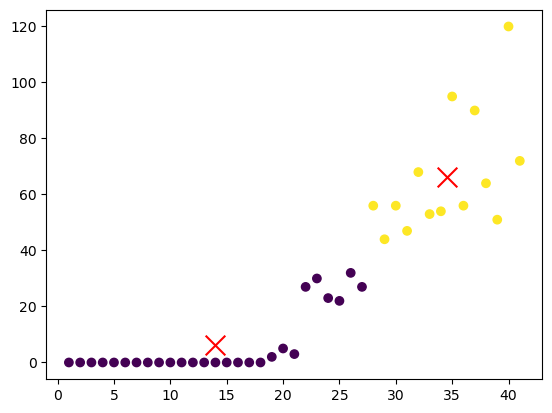

In [139]:
feature = 'monthly_forks'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


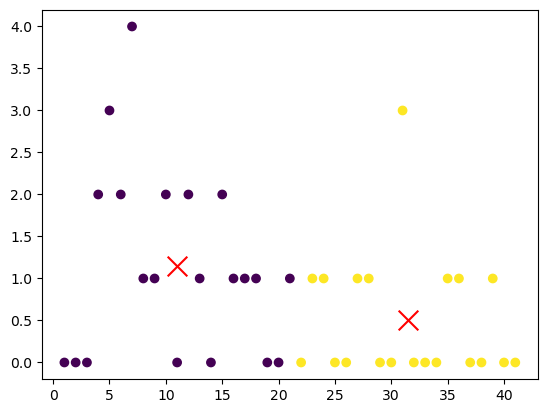

In [140]:
feature = 'monthly_watchers'
kmeans(feature)

In [141]:
data.head(3)

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,...,monthly_open_PRs_labels,monthly_closed_PRs_labels,monthly_merged_PRs_labels,monthly_PR_mergers_labels,monthly_PR_comments_labels,monthly_open_issues_labels,monthly_issue_comments_labels,monthly_stargazer_labels,monthly_forks_labels,monthly_watchers_labels
dates,,,,,,,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,...,0,1,0,1,0,1,0,1,0,0
2017-01-01,52,1,0,0,0,0,0,2,3,0,...,0,1,0,1,0,1,0,1,0,0
2017-02-01,40,1,0,0,0,0,0,1,5,0,...,0,1,0,1,0,1,0,1,0,0


# Check overlap

overlap is unhealth
monthly_open_PRs' 'monthly_closed_PRs'
result good

In [144]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,0,0,0,1
2017-01-01,0,0,0,1
2017-02-01,0,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,1,0,0,1
2017-06-01,0,0,0,1
2017-07-01,0,0,0,1
2017-08-01,0,0,0,1


In [ ]:
overlap is unhealth
monthly_open_PRs' 'activity'
result not good

In [145]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'activity', 'activity_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,activity,activity_labels
dates,,,,
2016-12-01,0,0,124,1
2017-01-01,0,0,53,1
2017-02-01,0,0,41,1
2017-03-01,0,0,8,1
2017-04-01,0,0,2,1
2017-05-01,1,0,22,1
2017-06-01,0,0,0,1
2017-07-01,0,0,24,1
2017-08-01,0,0,35,1


overlap is unhealth
monthly_closed_issues' 'monthly_closed_PRs'
result not good

In [143]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_closed_issues,monthly_closed_issues_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,23,0,0,1
2017-01-01,3,0,0,1
2017-02-01,5,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,5,0,0,1
2017-06-01,0,0,0,1
2017-07-01,4,0,0,1
2017-08-01,3,0,0,1


'monthly_open_issues', 'monthly_closed_issues'

In [146]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_issues','monthly_open_issues_labels', 'monthly_closed_issues', 'monthly_closed_issues_labels']]
selected_columns

,monthly_open_issues,monthly_open_issues_labels,monthly_closed_issues,monthly_closed_issues_labels
dates,,,,
2016-12-01,10,1,23,0
2017-01-01,2,1,3,0
2017-02-01,1,1,5,0
2017-03-01,0,1,0,0
2017-04-01,0,1,0,0
2017-05-01,0,1,5,0
2017-06-01,0,1,0,0
2017-07-01,1,1,4,0
2017-08-01,0,1,3,0


monthly_issue_comments
monthly_open_PRs

In [148]:
# Select and display only the desired columns
selected_columns = data[['monthly_issue_comments','monthly_issue_comments_labels', 'monthly_open_PRs', 'monthly_open_PRs_labels']]
selected_columns

,monthly_issue_comments,monthly_issue_comments_labels,monthly_open_PRs,monthly_open_PRs_labels
dates,,,,
2016-12-01,23,0,0,0
2017-01-01,0,0,0,0
2017-02-01,0,0,0,0
2017-03-01,0,0,0,0
2017-04-01,0,0,0,0
2017-05-01,1,0,1,0
2017-06-01,0,0,0,0
2017-07-01,6,0,0,0
2017-08-01,0,0,0,0


# KMedoids

In [151]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 2
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)


Cluster Medoids: [2 3]
Cluster Labels: [0 1 0 1 1]


# BIRCH

Cluster Labels: [0 2 0 1 1]


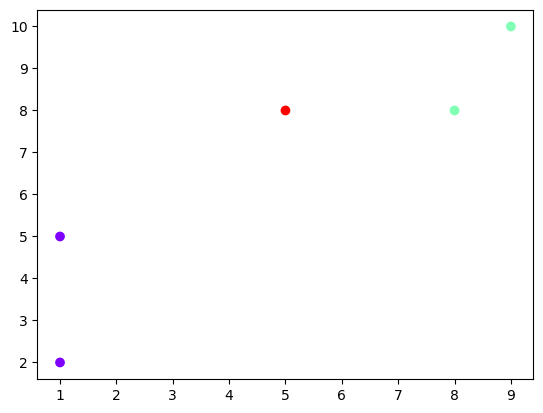

In [3]:
from sklearn.cluster import Birch
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Create a BIRCH clustering model
birch = Birch(threshold=0.5, branching_factor=50)

# Fit the model to your data
birch.fit(data)

# Predict the clusters for your data points
labels = birch.predict(data)

# Access the cluster centers
cluster_centers = birch.subcluster_centers_

# Access the number of clusters found
n_clusters = birch.n_clusters

labels = birch.labels_
print("Cluster Labels:", labels)
# You can also use birch.fit_predict(data) to fit and predict in one step

# To visualize the clusters, you can use a plotting library like Matplotlib
import matplotlib.pyplot as plt

# Assuming data is a 2D array
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/skle

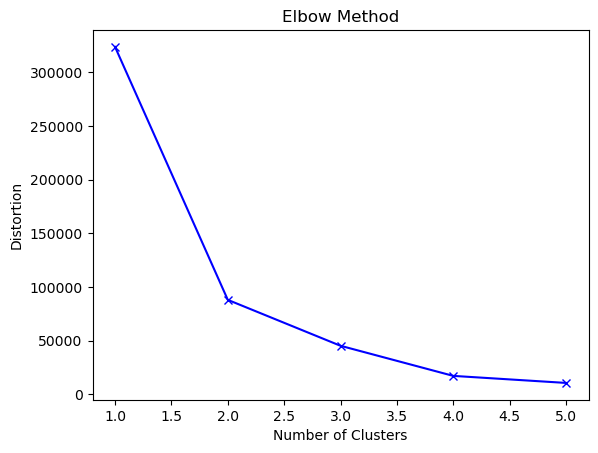

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


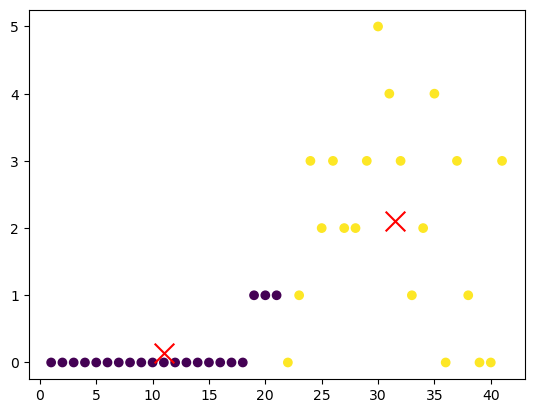

In [90]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
#data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
#df = pd.DataFrame(data, columns=['monthly_open_issues', 'monthly_closed_issues'])
df = pd.DataFrame(data, columns=['ID', 'monthly_closed_PRs'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['ID'], df['monthly_closed_PRs'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()

In [91]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [92]:
data['monthly_closed_PRs_labels'] = labels

In [93]:
print(data.head(3))

        dates  monthly_commits  monthly_contributors  monthly_open_PRs  \
0  2016-12-01              123                     1                 0   
1  2017-01-01               52                     1                 0   
2  2017-02-01               40                     1                 0   

   monthly_closed_PRs  monthly_merged_PRs  monthly_PR_mergers  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   monthly_PR_comments  monthly_open_issues  monthly_closed_issues  \
0                    0                   10                     23   
1                    0                    2                      3   
2                    0                    1                      5   

   monthly_issue_comments  monthly_stargazer  monthly_forks  monthly_watchers  \
0                      23                  0              0                 0   

In [95]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
print(selected_columns)

    monthly_closed_issues  monthly_closed_issues_labels  monthly_closed_PRs  \
0                      23                             1                   0   
1                       3                             1                   0   
2                       5                             1                   0   
3                       0                             1                   0   
4                       0                             1                   0   
5                       5                             1                   0   
6                       0                             1                   0   
7                       4                             1                   0   
8                       3                             1                   0   
9                      24                             1                   0   
10                     21                             1                   0   
11                      3                           

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


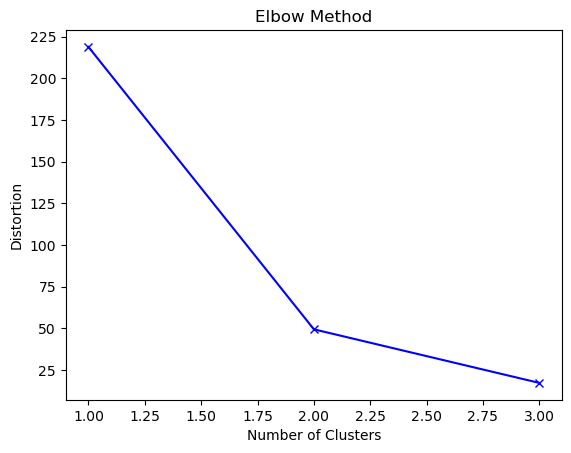

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


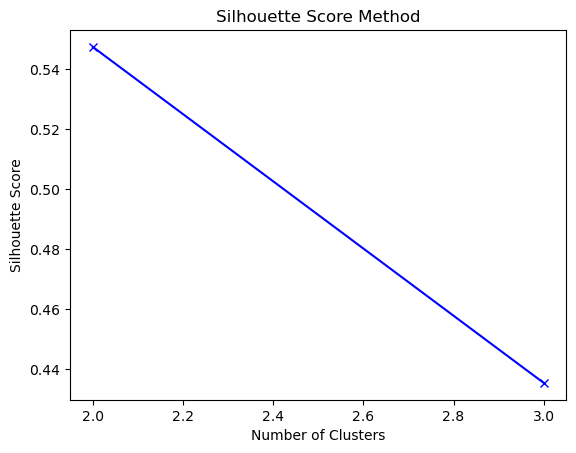

In [58]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


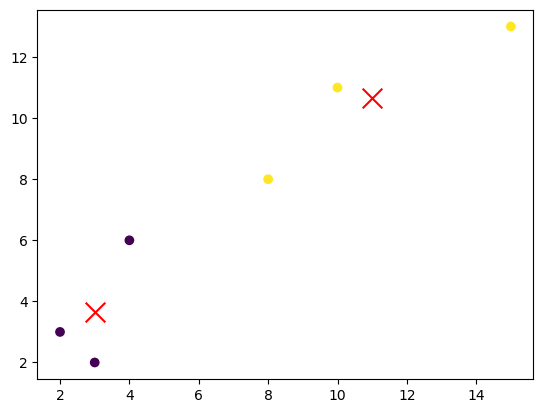

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['X'], df['Y'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()


In [60]:
df

,X,Y
0,2,3
1,4,6
2,8,8
3,3,2
4,10,11
5,15,13
